In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
cwd = os.getcwd()

In [12]:
diccionario_tipos = {
    "tipodepropiedad":"category",
    "provincia":"category",
    "provincia":"category",
    #"habitaciones":"int",
    #"garages":"int",
    #"banos":"int",
    #'metroscubiertos':, 'metrostotales', 'idzona', 'lat', 'lng',
    'gimnasio':"bool",
    'usosmultiples':"bool",
    'piscina':"bool",
    'escuelascercanas':"bool",
    'centroscomercialescercanos':"bool"
}
df = pd.read_csv(cwd+"/train.csv", index_col='id', parse_dates=['fecha'])

In [14]:
"UNIFICO ALGUNOS VALORES"
df.loc[df['tipodepropiedad'] == 'Casa uso de suelo', 'tipodepropiedad'] = 'Casa'
df.loc[df['tipodepropiedad'] == 'Departamento Compartido', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Apartamento', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Edificio', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Local Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Bodega comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Terreno comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Oficina Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Local en centro comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Nave industrial', 'tipodepropiedad'] = 'Terreno industrial'

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Porcentaje')

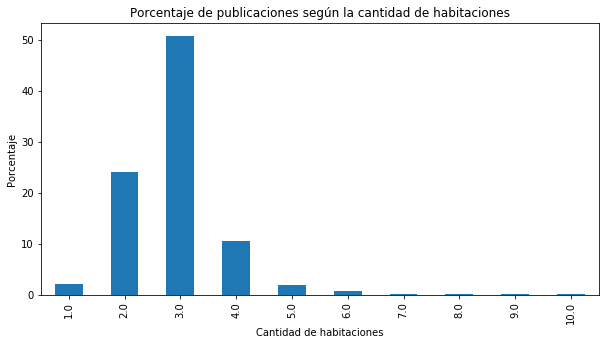

In [15]:
plt.figure(figsize=(10,5))
cantidad_habitaciones = df["habitaciones"].value_counts()
cantidad_habitaciones_porcentaje = cantidad_habitaciones *100 / len(df.index)
g = cantidad_habitaciones_porcentaje.sort_index().plot('bar')
plt.title("Porcentaje de publicaciones según la cantidad de habitaciones")
g.set_xlabel("Cantidad de habitaciones")
g.set_ylabel("Porcentaje")

Hay una clara mayoría de propiedades con 3 habitaciones, siendo estas el 50% de las publicaciones del Data Set. Y se ve muy claramente como las propiedades con muchas habitaciones (5+) son una clara minoría

#### Analisis de Propiedades con 3 habitaciones
Dado que las propiedades con 3 habitaciones resultan un numero muy importante en los datos vamos a explorarlas mas a fondo

In [ ]:
fig = plt.figure(figsize=(15,5))
g =df.groupby("habitaciones").agg({"precio":"mean"}).plot(kind = "bar")

In [ ]:
df.loc[df["provincia"] == "Distrito Federal"].groupby("habitaciones").agg({"precio":"mean"}).plot(kind = "bar")

In [ ]:
df["cantidad"] = 1
ciudad = df.groupby(["provincia","habitaciones"]).agg({"cantidad":sum})
ciudad.unstack().T.idxmax().map(lambda x: x[1])

#### Analisis de las propiedades con 1 habitacion

In [ ]:
monoambientes = df.loc[df["habitaciones"] == 1]
monoambientes["tipodepropiedad"].value_counts().plot("bar")

In [18]:
df['cantidad'] = 1

Text(0.5, 1.0, 'Casas')

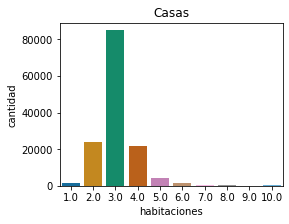

In [19]:
#lista = df.groupby(["tipodepropiedad"]).agg({"cantidad":sum}).sort_values("cantidad",ascending = False).head(3)
#lista = lista.index.to_list()
#principales = df[df["tipodepropiedad"].isin(lista)].copy()
plt.figure(figsize=(4, 3))
plt.ticklabel_format(style='plain', axis='y')
hab = df.loc[df.tipodepropiedad == 'Casa']
hab = hab.groupby(['tipodepropiedad', 'habitaciones']).agg({'cantidad':sum}).reset_index().copy()
sns.barplot(x="habitaciones",y="cantidad", data=hab, palette="colorblind").set_title('Casas')

Text(0.5, 1.0, 'Departamentos')

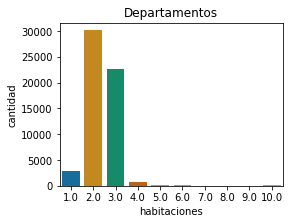

In [20]:
plt.figure(figsize=(4, 3))
plt.ticklabel_format(style='plain', axis='y')
hab = df.loc[df.tipodepropiedad == 'Departamento']
hab = hab.groupby(['tipodepropiedad', 'habitaciones']).agg({'cantidad':sum}).reset_index().copy()
sns.barplot(x="habitaciones",y="cantidad", data=hab, palette="colorblind").set_title('Departamentos')

Text(0.5, 1.0, 'Casa en condominio')

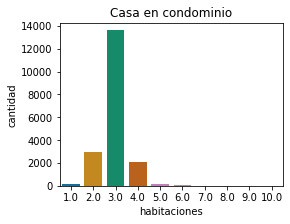

In [21]:
plt.figure(figsize=(4, 3))
plt.ticklabel_format(style='plain', axis='y')
hab = df.loc[df.tipodepropiedad == 'Casa en condominio']
hab = hab.groupby(['tipodepropiedad', 'habitaciones']).agg({'cantidad':sum}).reset_index().copy()
sns.barplot(x="habitaciones",y="cantidad", data=hab, palette="colorblind").set_title('Casa en condominio')